In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

/home/wfn7ad/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
final_data = pd.read_csv("../../data/mergent_and_library/final_data_v2.csv")
final_data

,X,Unnamed..0,duns,company_name,firstname,lastname,title,gender,flag_owner,flag_presi_vicepresi,...,naics_name,flag_executive_reported,geoid,prop_nwh,geometry,prob_spacy,prob_gt,prob_ld,prob_nw_rbert,prob_nw_rethn
0,0,0,00-138-3244,"WILSON, LYNNFORD SAMUEL JR",Lynnford,Wilson,Owner,U,1,0,...,Health Care and Social Assistance,1,5.105948e+10,26.602177,"c(-77.324596, 38.999535)",0.999995,0.0,1,0.819709,0.809268
1,1,1,00-145-3948,CROCODILE CONSULTING,Jessica,Moore,Administrative Assistant Sales,FEMALE,0,0,...,"Professional, Scientific, and Technical Services",1,5.105948e+10,20.372268,"c(-77.389534, 38.994397)",0.000000,0.0,0,0.201729,0.534265
2,2,2,00-145-3948,CROCODILE CONSULTING,Leonard,Caldwell,Owner,MALE,1,0,...,"Professional, Scientific, and Technical Services",1,5.105948e+10,20.372268,"c(-77.389534, 38.994397)",0.000000,0.0,0,0.402071,0.670843
3,3,3,00-171-0412,CENTREVILLE TAX SERVICE LLC,Scott,Walls,Owner,MALE,1,0,...,"Professional, Scientific, and Technical Services",1,5.105949e+10,19.153605,"c(-77.460635, 38.8639)",0.999994,0.0,1,0.023717,0.210296
4,4,4,00-183-0152,KAUFMAN ASSOC,Betsy,Kaufman,Owner,FEMALE,1,0,...,"Professional, Scientific, and Technical Services",1,5.105942e+10,36.208236,"c(-77.08656, 38.777228)",0.999673,0.0,1,0.036510,0.159237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18151,18151,18151,96-994-4219,"GEOPAY, INC.",Karla,Russell,Chief Operating Officer,FEMALE,0,0,...,Other Services (except Public Administration),1,5.105948e+10,34.302699,"c(-77.331479, 38.948677)",0.000000,0.0,0,NaN,0.800575
18152,18152,18152,96-995-4812,K EDWARD ROBINSON & ASSOCIATES LLC,Keith,Robinson,Pres-ceo,MALE,0,0,...,"Professional, Scientific, and Technical Services",1,5.105942e+10,62.402930,"c(-77.230478, 38.707725)",0.999673,0.0,1,NaN,0.906111
18153,18153,18153,96-996-0488,"LAGNIAPPE CONSULTING, LLC",Wallace,Daniels,Owner,MALE,1,0,...,"Professional, Scientific, and Technical Services",1,5.105942e+10,60.324061,"c(-77.097715, 38.7433)",0.000000,0.0,0,NaN,0.872609
18154,18154,18154,96-996-0488,"LAGNIAPPE CONSULTING, LLC",Omar,Daniels,Co-owner,MALE,0,0,...,"Professional, Scientific, and Technical Services",1,5.105942e+10,60.324061,"c(-77.097715, 38.7433)",0.000000,0.0,0,NaN,0.975594


In [12]:
x = final_data[final_data['flag_listing'] == 1]
x

,X,Unnamed..0,duns,company_name,firstname,lastname,title,gender,flag_owner,flag_presi_vicepresi,...,naics_name,flag_executive_reported,geoid,prop_nwh,geometry,prob_spacy,prob_gt,prob_ld,prob_nw_rbert,prob_nw_rethn
127,127,127,00-347-7485,DSB MANAGEMENT CONSULTANTS LLC,Donna,Brown,Prin,FEMALE,0,0,...,"Professional, Scientific, and Technical Services",1,5.105945e+10,42.839879,"c(-77.200105, 38.844514)",0.000000,0.000000,0,0.173511,0.447859
1035,1035,1035,01-022-8836,ICUBE SYSTEMS INC,Narayan,Athreya,President,MALE,0,1,...,"Professional, Scientific, and Technical Services",1,5.105949e+10,56.009403,"c(-77.408478, 38.832827)",0.999992,0.606891,1,0.928174,0.998955
1036,1036,1036,01-022-8836,ICUBE SYSTEMS INC,Narayan,Athreya,General Manager,MALE,0,0,...,"Professional, Scientific, and Technical Services",1,5.105949e+10,56.009403,"c(-77.408478, 38.832827)",0.999992,0.606891,1,NaN,0.998955
1037,1037,1037,01-022-8836,ICUBE SYSTEMS INC,Geetha,Athreya,General Manager,FEMALE,0,0,...,"Professional, Scientific, and Technical Services",1,5.105949e+10,56.009403,"c(-77.408478, 38.832827)",0.999992,0.606891,1,NaN,0.999812
1410,1410,1410,01-298-6663,HYATT PLACE HERNDON/DULLES AIRPORT EAST,Rajesh,Singh,General Manager,MALE,0,0,...,Accommodation and Food Services,1,5.105948e+10,58.622301,"c(-77.420266, 38.957517)",0.999886,0.000000,1,NaN,0.999884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17231,17231,17231,96-230-2191,"JP CONSTRUCTION & BUILDING SERVICES, INC.",Jung,Park,Presidnet,MALE,0,0,...,Construction,1,5.105943e+10,33.479512,"c(-77.222199, 38.809114)",0.999993,0.000000,1,NaN,0.999948
18078,18078,18078,96-905-4720,"MERP SYSTEMS, INC.",Sree,Nair,Vice President,FEMALE,0,1,...,"Professional, Scientific, and Technical Services",1,5.105948e+10,39.921530,"c(-77.3861, 38.96955)",0.000000,1.000000,0,0.959590,0.982707
18079,18079,18079,96-905-4720,"MERP SYSTEMS, INC.",Prem,Nair,Partner,MALE,0,0,...,"Professional, Scientific, and Technical Services",1,5.105948e+10,39.921530,"c(-77.3861, 38.96955)",0.000000,1.000000,0,NaN,0.960197
18080,18080,18080,96-905-4720,"MERP SYSTEMS, INC.",Prem,Nair,General Manager,MALE,0,0,...,"Professional, Scientific, and Technical Services",1,5.105948e+10,39.921530,"c(-77.3861, 38.96955)",0.000000,1.000000,0,NaN,0.960197


In [3]:
final_data.columns

Index(['X', 'Unnamed..0', 'duns', 'company_name', 'firstname', 'lastname',
       'title', 'gender', 'flag_owner', 'flag_presi_vicepresi',
       'prob_nw_eth_wiki', 'prob_nw_eth_fl_reg_name',
       'prob_nw_eth_fl_five_cat', 'prob_nw_eth_census_fn',
       'prob_nw_eth_census_ln', 'prob_nw_eth_nc', 'company_name0', 'address',
       'city', 'state', 'zipcode', 'flag_mergent', 'pos', 'flag_axle',
       'flag_sbsd', 'flag_chamber', 'flag_yelp', 'flag_listing',
       'flag_mergent_plus_listing', 'founding_year', 'primary_naics', 'naics2',
       'naics_name', 'flag_executive_reported', 'geoid', 'prop_nwh',
       'geometry', 'prob_spacy', 'prob_gt', 'prob_ld', 'prob_nw_rbert',
       'prob_nw_rethn'],
      dtype='object')

In [4]:
varlist=['duns','company_name', 'flag_owner', 'flag_mergent_plus_listing','flag_mergent', 'flag_listing', 'founding_year','naics2', 'prop_nwh', 'prob_nw_eth_wiki', 'prob_nw_eth_fl_reg_name',
       'prob_nw_eth_fl_five_cat', 'prob_nw_eth_census_fn',
       'prob_nw_eth_census_ln', 'prob_nw_eth_nc','prob_spacy', 'prob_gt', 'prob_ld', 'prob_nw_rbert',
       'prob_nw_rethn']

data = final_data[varlist]

In [5]:
print('number of observation',len(data))
data.isna().sum()

number of observation 18156


duns                             0
company_name                     0
flag_owner                       0
flag_mergent_plus_listing        0
flag_mergent                     0
flag_listing                     0
founding_year                    9
naics2                           0
prop_nwh                       280
prob_nw_eth_wiki              1846
prob_nw_eth_fl_reg_name       3380
prob_nw_eth_fl_five_cat      11800
prob_nw_eth_census_fn        13625
prob_nw_eth_census_ln         7959
prob_nw_eth_nc               11800
prob_spacy                       0
prob_gt                          0
prob_ld                          0
prob_nw_rbert                14724
prob_nw_rethn                    0
dtype: int64

In [6]:
print('number of observation',len(data))
df1 = data[pd.notna(data['prop_nwh'])]
df1.isna().sum()

number of observation 18156


duns                             0
company_name                     0
flag_owner                       0
flag_mergent_plus_listing        0
flag_mergent                     0
flag_listing                     0
founding_year                    7
naics2                           0
prop_nwh                         0
prob_nw_eth_wiki              1818
prob_nw_eth_fl_reg_name       3324
prob_nw_eth_fl_five_cat      11591
prob_nw_eth_census_fn        13397
prob_nw_eth_census_ln         7810
prob_nw_eth_nc               11591
prob_spacy                       0
prob_gt                          0
prob_ld                          0
prob_nw_rbert                14504
prob_nw_rethn                    0
dtype: int64

In [7]:
df1.loc[df1['prob_nw_eth_wiki'] == 1.0, 'prob_nw_eth_wiki'] = float("nan")
df1

,duns,company_name,flag_owner,flag_mergent_plus_listing,flag_mergent,flag_listing,founding_year,naics2,prop_nwh,prob_nw_eth_wiki,prob_nw_eth_fl_reg_name,prob_nw_eth_fl_five_cat,prob_nw_eth_census_fn,prob_nw_eth_census_ln,prob_nw_eth_nc,prob_spacy,prob_gt,prob_ld,prob_nw_rbert,prob_nw_rethn
0,00-138-3244,"WILSON, LYNNFORD SAMUEL JR",1,0,0,0,2002.0,62,26.602177,0.917946,0.621173,NaN,NaN,0.339193,NaN,0.999995,0.0,1,0.819709,0.809268
1,00-145-3948,CROCODILE CONSULTING,0,0,0,0,2000.0,54,20.372268,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0,0.201729,0.534265
2,00-145-3948,CROCODILE CONSULTING,1,0,0,0,2000.0,54,20.372268,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0,0.402071,0.670843
3,00-171-0412,CENTREVILLE TAX SERVICE LLC,1,0,0,0,1997.0,54,19.153605,0.087375,0.116998,NaN,NaN,NaN,NaN,0.999994,0.0,1,0.023717,0.210296
4,00-183-0152,KAUFMAN ASSOC,1,0,0,0,1997.0,54,36.208236,0.957856,0.843029,NaN,NaN,NaN,NaN,0.999673,0.0,1,0.036510,0.159237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18151,96-994-4219,"GEOPAY, INC.",0,0,0,0,2011.0,81,34.302699,0.747244,0.962319,0.595566,0.602393,0.011384,0.566017,0.000000,0.0,0,NaN,0.800575
18152,96-995-4812,K EDWARD ROBINSON & ASSOCIATES LLC,0,0,0,0,2011.0,54,62.402930,NaN,NaN,NaN,NaN,NaN,NaN,0.999673,0.0,1,NaN,0.906111
18153,96-996-0488,"LAGNIAPPE CONSULTING, LLC",1,1,1,0,2011.0,54,60.324061,0.064103,0.202185,0.389103,0.199878,0.096081,0.267925,0.000000,0.0,0,NaN,0.872609
18154,96-996-0488,"LAGNIAPPE CONSULTING, LLC",0,1,1,0,2011.0,54,60.324061,0.022954,0.134204,0.373937,0.248325,0.126127,0.552511,0.000000,0.0,0,NaN,0.975594


In [8]:
# compute statistics by company (not by owner+company)
df2 = df1.groupby(['duns']).mean(numeric_only=True)
df2.isna().sum()

flag_owner                      0
flag_mergent_plus_listing       0
flag_mergent                    0
flag_listing                    0
founding_year                   6
naics2                          0
prop_nwh                        0
prob_nw_eth_wiki             1433
prob_nw_eth_fl_reg_name      1433
prob_nw_eth_fl_five_cat      8100
prob_nw_eth_census_fn        9384
prob_nw_eth_census_ln        5306
prob_nw_eth_nc               8100
prob_spacy                      0
prob_gt                         0
prob_ld                         0
prob_nw_rbert                9197
prob_nw_rethn                   0
dtype: int64

In [9]:
# filter on founding year
cutoff = 1964
nonminority_filter = df2[df2['founding_year'] <= cutoff]
nonminority_filter = nonminority_filter[nonminority_filter['founding_year'] != 0]

In [10]:
# EDA of the data
print('number of company in mergent:',len(df2))
print('number of minority-owned:',len(df2[df2['flag_mergent_plus_listing']==1]))
print('number of non minority-owned:',len(nonminority_filter))
print('error made by mergent:', (len(df2[(df2['flag_listing'] == 1) & (df2['flag_mergent'] == 0)]))*100 / len(df2[df2['flag_listing'] == 1]))

number of company in mergent: 12123
number of minority-owned: 442
number of non minority-owned: 69
error made by mergent: 39.473684210526315


# Modeling data

In [11]:
# build the sample
n = len(nonminority_filter)
subset = df2[df2['flag_mergent_plus_listing']==1].sample(n,replace=False)
sample = pd.concat([nonminority_filter, subset])
sample.head()

,flag_owner,flag_mergent_plus_listing,flag_mergent,flag_listing,founding_year,naics2,prop_nwh,prob_nw_eth_wiki,prob_nw_eth_fl_reg_name,prob_nw_eth_fl_five_cat,prob_nw_eth_census_fn,prob_nw_eth_census_ln,prob_nw_eth_nc,prob_spacy,prob_gt,prob_ld,prob_nw_rbert,prob_nw_rethn
duns,,,,,,,,,,,,,,,,,,
00-490-4579,0.0,0.0,0.0,0.0,1951.0,48.0,19.603425,0.133032,0.282486,NaN,NaN,0.695196,NaN,0.999994,0.0,1.0,0.388712,0.364378
01-664-4866,0.0,0.0,0.0,0.0,1957.0,81.0,16.278582,0.308368,0.990056,0.996808,0.212395,0.210200,0.975138,0.999835,0.0,1.0,NaN,0.552304
02-030-1743,0.0,0.0,0.0,0.0,1950.0,23.0,28.785951,NaN,NaN,NaN,NaN,NaN,NaN,0.999992,0.0,1.0,NaN,0.554421
02-363-7416,0.0,0.0,0.0,0.0,1959.0,44.0,66.913727,0.364197,0.400813,NaN,NaN,NaN,NaN,0.999833,0.0,1.0,NaN,0.252118
02-380-6391,0.0,0.0,0.0,0.0,1941.0,23.0,57.698764,0.081215,0.015678,0.945481,NaN,0.964284,0.755374,0.999832,0.0,1.0,NaN,0.963356


In [12]:
print("number of listing in sample:", len(sample[sample['flag_listing']==1]))
test= sample[sample['flag_listing']==1]
test.head()

number of listing in sample: 9


,flag_owner,flag_mergent_plus_listing,flag_mergent,flag_listing,founding_year,naics2,prop_nwh,prob_nw_eth_wiki,prob_nw_eth_fl_reg_name,prob_nw_eth_fl_five_cat,prob_nw_eth_census_fn,prob_nw_eth_census_ln,prob_nw_eth_nc,prob_spacy,prob_gt,prob_ld,prob_nw_rbert,prob_nw_rethn
duns,,,,,,,,,,,,,,,,,,
07-944-0320,0.0,1.0,1.0,1.0,2014.0,52.0,33.479512,0.030873,0.031364,NaN,NaN,0.327151,NaN,0.999673,0.0,1.0,0.983740,0.948875
07-920-6121,0.0,1.0,1.0,1.0,2013.0,23.0,55.917820,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.0,0.830096,0.995695
96-905-4720,0.0,1.0,1.0,1.0,2010.0,54.0,39.921530,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,0.0,0.959590,0.970152
01-563-2647,0.0,1.0,0.0,1.0,2008.0,81.0,48.057168,0.879487,0.538763,NaN,NaN,NaN,NaN,0.000000,0.0,0.0,0.985619,0.999962
07-922-4651,0.0,1.0,1.0,1.0,2013.0,54.0,27.646018,0.993549,0.970815,0.486143,NaN,0.252831,0.510372,0.999992,0.0,1.0,NaN,0.117198


# EDA

In [13]:
#Build the label
sample.loc[sample['flag_mergent']==1,'ownership'] = 'minority'
sample.loc[sample['flag_mergent']==0,'ownership'] = 'non-minority'

<AxesSubplot:xlabel='ownership', ylabel='prob_nw_eth_wiki'>

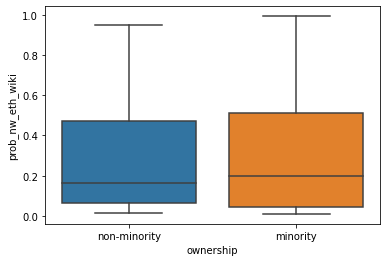

In [14]:
# boxplot of the average prob to be non-white for wiki 
sns.boxplot( x=sample["ownership"], y=sample["prob_nw_eth_wiki"] )

<AxesSubplot:xlabel='ownership', ylabel='prob_nw_rbert'>

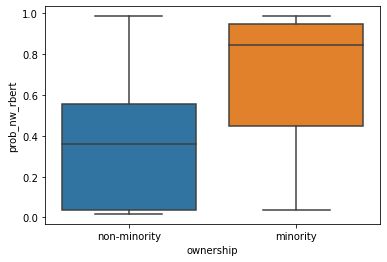

In [15]:
# boxplot of the average prob to be non-white for racebert
sns.boxplot( x=sample["ownership"], y=sample["prob_nw_rbert"] )

<AxesSubplot:xlabel='ownership', ylabel='prob_nw_rethn'>

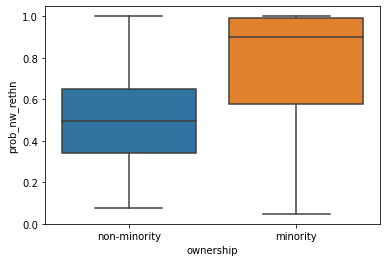

In [16]:
# boxplot of the average prob to be non-white for rethinicity
sns.boxplot( x=sample["ownership"], y=sample["prob_nw_rethn"] )

<AxesSubplot:xlabel='ownership', ylabel='prop_nwh'>

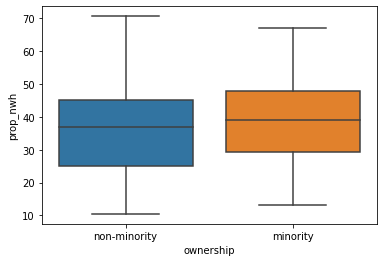

In [17]:
# boxplot of the average prob to be non-white for population
sns.boxplot( x=sample["ownership"], y=sample["prop_nwh"] )

<AxesSubplot:xlabel='ownership', ylabel='prob_ld'>

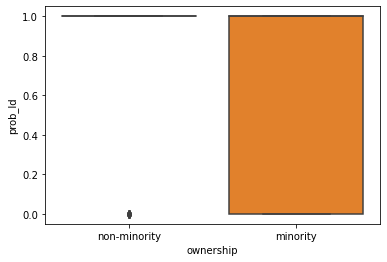

In [18]:
# boxplot of the average prob to be non-white for population
sns.boxplot( x=sample["ownership"], y=sample["prob_ld"] )

<AxesSubplot:xlabel='ownership', ylabel='prob_spacy'>

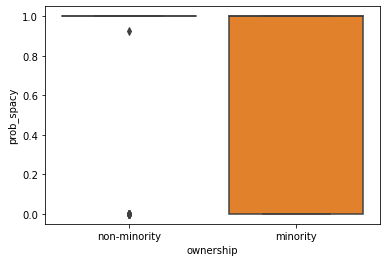

In [19]:
# boxplot of the average prob to be non-white for population
sns.boxplot( x=sample["ownership"], y=sample["prob_spacy"] )

<AxesSubplot:xlabel='ownership', ylabel='prob_gt'>

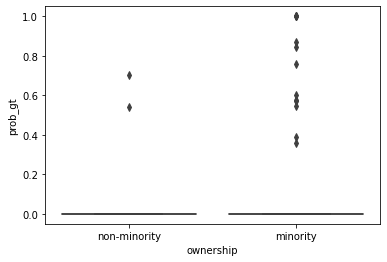

In [20]:
# boxplot of the average prob to be non-white for population
sns.boxplot( x=sample["ownership"], y=sample["prob_gt"] )

# Build and Train a classifier

In [21]:
# Decison Tree #1. with companies not filtered to pre 1964
feature_cols = ["prob_nw_rbert", "prob_nw_rethn", "prop_nwh", "prob_ld"]
Y = sample['flag_mergent_plus_listing']
X = sample[feature_cols]

In [22]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(random_state=0)

# Train Decision Tree Classifer
clf = classifier.fit(X,Y)

## viewing the decision tree classifier

In [23]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

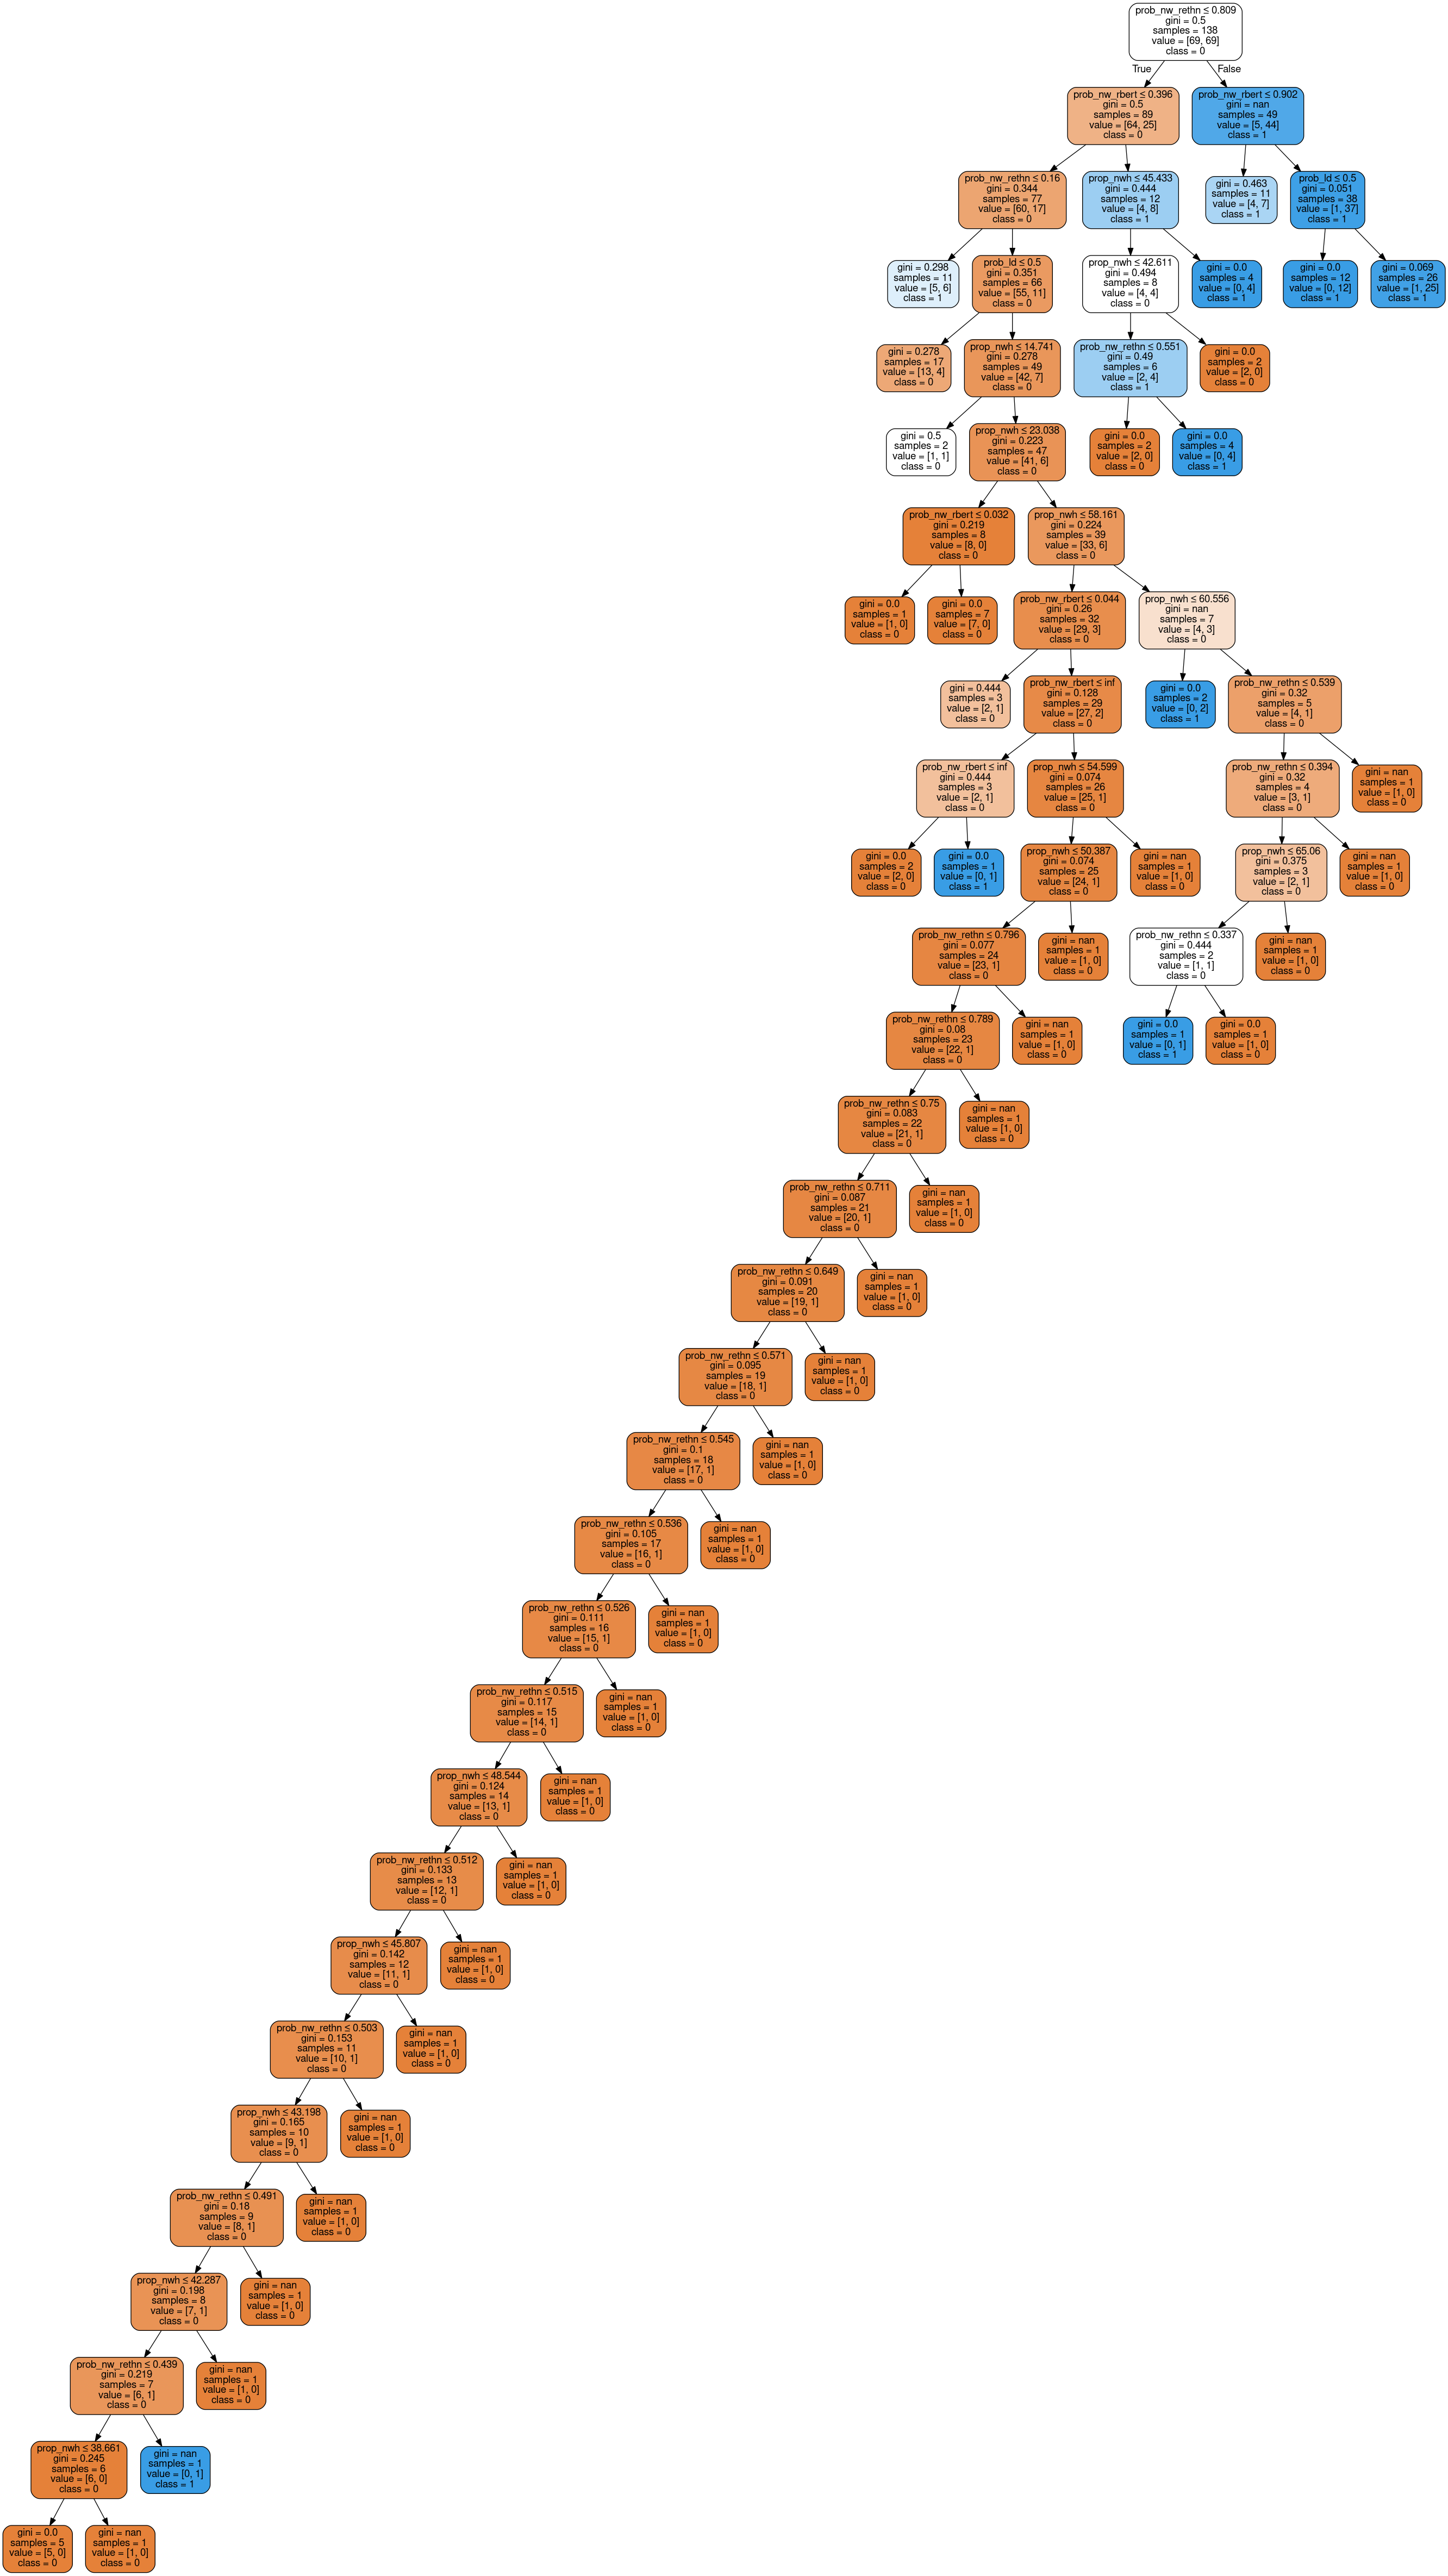

In [24]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decTreeREAL.png')
Image(graph.create_png())

# Prediction and evaluation

In [25]:
# predict the flag using the model
df2['flag_predicted'] = clf.predict(df2[feature_cols])

In [26]:
# validation: Does the model reduce the error?
print('error made by mergent:', (len(df2[(df2['flag_listing'] == 1) & (df2['flag_predicted'] == 0)]))*100 / len(df2[df2['flag_listing'] == 1]))

error made by mergent: 18.42105263157895


In [27]:
# Benchmarking:
print('Total number of companies:',len(df2))
print('number of minority-owned:',len(df2[df2['flag_predicted']==1]))
print('Percentage of minority-owned:',100*len(df2[df2['flag_predicted']==1])/len(df2))

Total number of companies: 12123
number of minority-owned: 5744
Percentage of minority-owned: 47.38101130083313


In [28]:
# cross-table for the error
pd.crosstab(df2['flag_predicted'], df2['flag_mergent_plus_listing'])

flag_mergent_plus_listing,0.0,1.0
flag_predicted,,
0.0,6269,110
1.0,5412,332


In [29]:
# within the listing, analyse the error
subset_listing=df2[df2['flag_listing']==1]
pd.crosstab(subset_listing['flag_predicted'], subset_listing['flag_mergent'])

# The model correct the flag=0 made by mergent. Out of the 15 wrongly flagged by mergent 12 have been predicted as minority by the model
# However, the model badly predict company already flagged as minority by mergent.

flag_mergent,0.0,1.0
flag_predicted,,
0.0,2,5
1.0,13,18


In [30]:
# To correct the baised from the model in wrongly identifying minority, we combine the flag from mergent + the prediction.
# for company already flagged as minority we keep them as minority.
# But for those flagged as non-minority by mergent, we apply the prediction of the model
df2['flag_new'] = df2['flag_mergent']
df2.loc[df2['flag_new'] == 0, 'flag_new'] = df2.loc[df2['flag_new'] == 0, 'flag_predicted']

In [31]:
# Benchmarking:
print('Total number of companies:',len(df2))
print('number of minority-owned:',len(df2[df2['flag_new']==1]))
print('Percentage of minority-owned:',100*len(df2[df2['flag_new']==1])/len(df2))

Total number of companies: 12123
number of minority-owned: 5852
Percentage of minority-owned: 48.27187989771509


In [32]:
# cross-table for the error
pd.crosstab(df2['flag_new'], df2['flag_mergent'])

flag_mergent,0.0,1.0
flag_new,,
0.0,6271,0
1.0,5425,427


In [33]:
# save the data
df2.to_csv("../../data/mergent_and_library/predicted_mergent.csv")

# gaining confidence in our method 

In [34]:
# cross the training sample with the listing 
